<a href="https://colab.research.google.com/github/mahin-arvind/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING./blob/main/Copy_of_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE


%matplotlib inline

In [137]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [138]:
path = '/content/drive/MyDrive/Datasets/Unsupervised/Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
df = pd.read_csv(path)

INFORMATION: COLUMN NAMES, MISSING VALUES AND DATA TYPES

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


COLUMNS


In [140]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

DATASET SUMMARY

In [141]:
df.describe(include = 'O').T

,count,unique,top,freq
show_id,7787,7787,s1,1
type,7787,2,Movie,5377
title,7787,7787,3%,1
director,5398,4049,"Raúl Campos, Jan Suter",18
cast,7069,6831,David Attenborough,18
country,7280,681,United States,2555
date_added,7777,1565,"January 1, 2020",118
rating,7780,14,TV-MA,2863
duration,7787,216,1 Season,1608
listed_in,7787,492,Documentaries,334


In [142]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,7787.0,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0


MISSING VALUES

In [143]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [144]:
#HANDLING MISSING VALUES
df['director'].fillna('unknown director', inplace=True)
df['cast'].fillna('unknown cast', inplace=True)
df['country'].fillna('unknown country', inplace=True)
df['date_added'].fillna('unknown date_added', inplace=True)
df['rating'].fillna('unknown rating', inplace=True)

CONVERTING 'date_added' to datetime format

In [145]:
import datetime as dt

In [146]:
def date(row):
  a = row['date_added']
  if 'unknown date_added' not in a:
    month = a.split()[0]
    year = a.split()[-1]
    day = a.split()[1].split(',')[0]
    a = dt.datetime.strptime(f'{month[:3]} {day} {year}' , '%b %d %Y')
    return a
  else:
    return np.nan

df['date_added'] = df.apply(lambda x: date(x), axis=1)


##**Viz**

### **Histogram plot of release dates of shows/movies on Netflix**

<Figure size 1008x576 with 0 Axes>

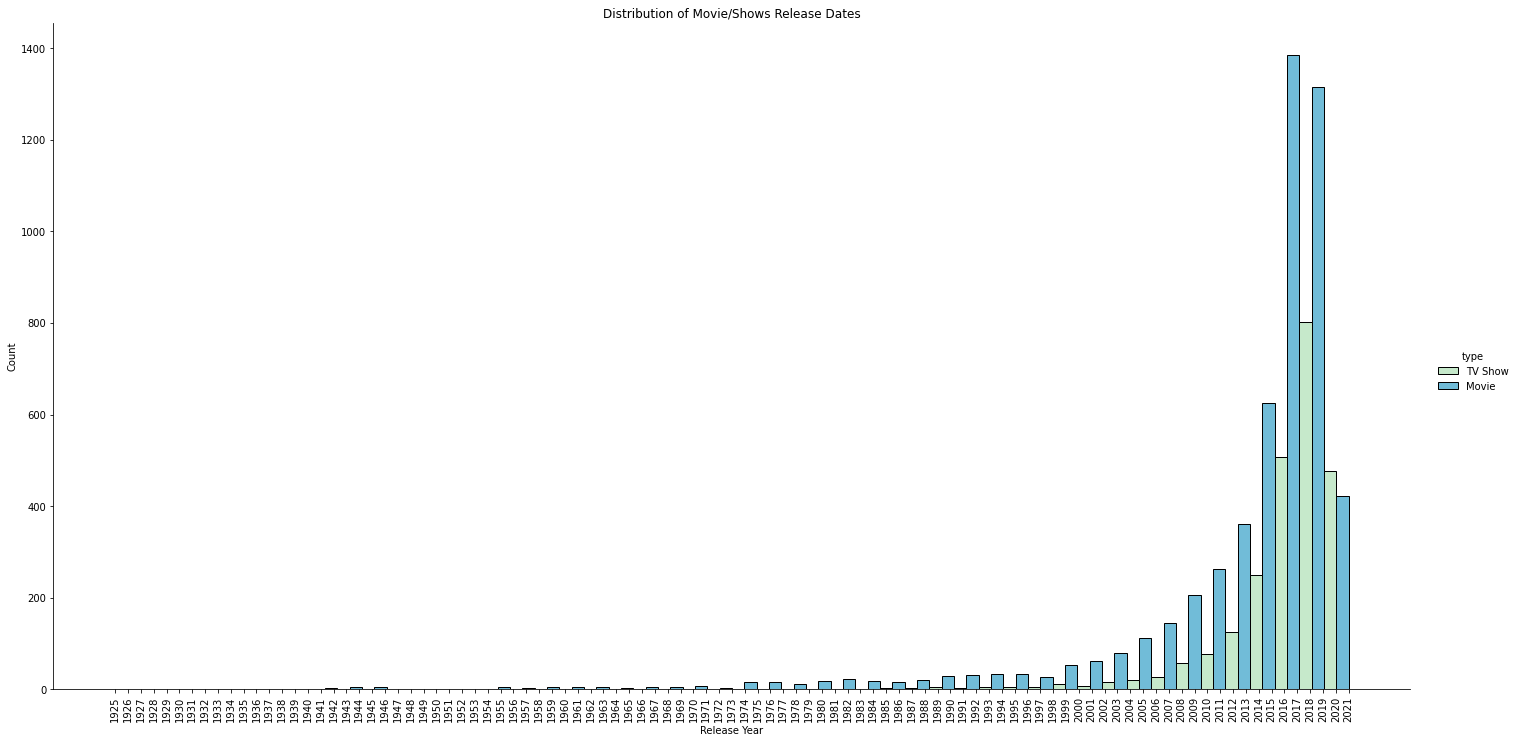

In [147]:
a = plt.figure(figsize=(14,8))
a = sns.displot(x='release_year', hue = 'type', data = df, kind = 'hist', height=10, aspect=2, bins = 50, multiple='dodge', palette='GnBu')
a = plt.xticks(ticks= np.arange(df.release_year.min(),df.release_year.max()+1,1), rotation = 90)
a = plt.title('Distribution of Movie/Shows Release Dates')
a = plt.xlabel('Release Year')

####**OBSERVATIONS**
> * **Most Movies streaming on the platform were released after 2010**
> * **Most  TV Shows streaming on the platform were released after 2015**
> * **The year 2017 had highest number of Movie and TV show releases on the platform**

In [148]:
df['date_added'].dt.year.max()

2021.0

### **Histogram plot of dates of number of shows/movies added by the Streaming giant**

<Figure size 1008x576 with 0 Axes>

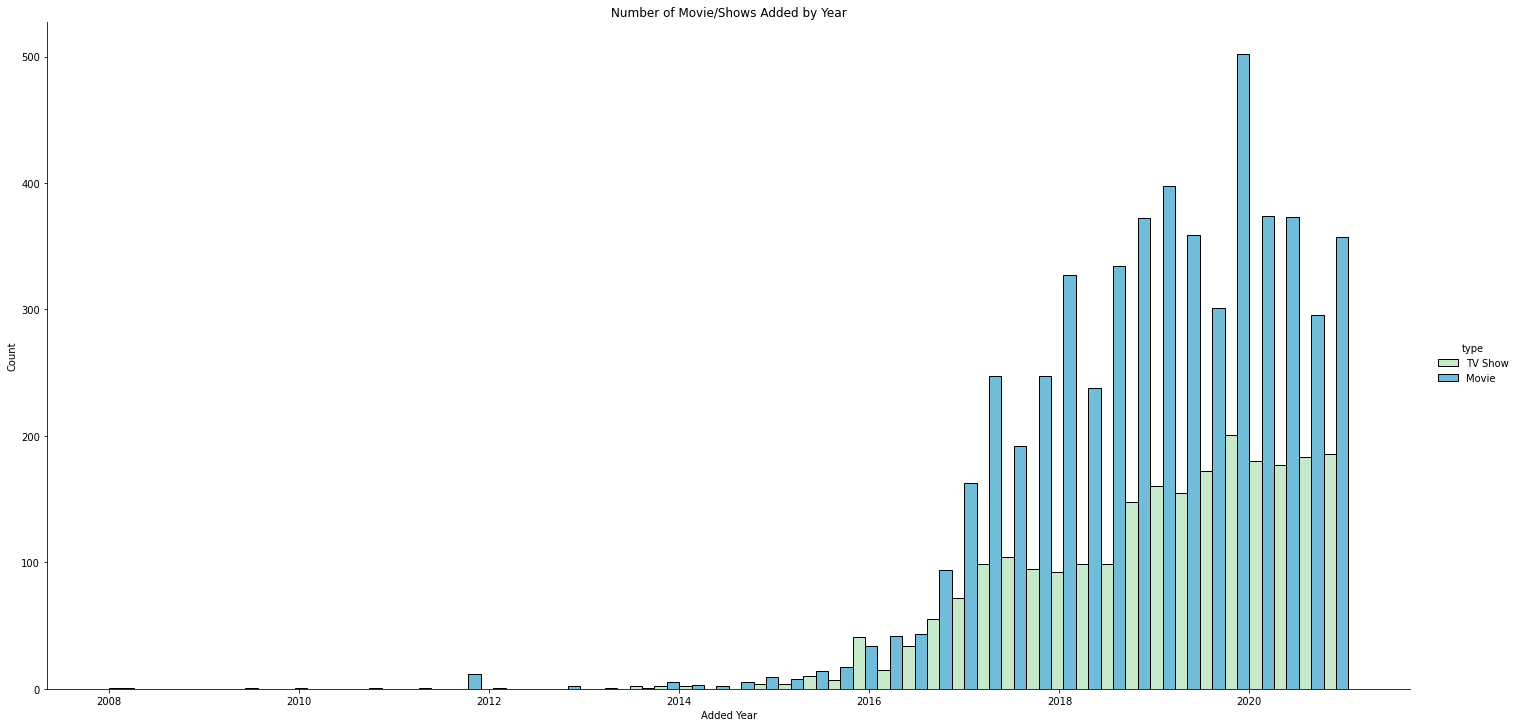

In [149]:
a = plt.figure(figsize=(14,8))
a = sns.displot(x= df['date_added'], hue = 'type', data = df, kind = 'hist', height=10, aspect=2, bins = 50, multiple='dodge', palette='GnBu')
a = plt.title('Number of Movie/Shows Added by Year')
a = plt.xlabel('Added Year')

####**OBSERVATIONS**
> * **Netflix began adding videos to the platform from 2008**
> * **The streaming giant started aggressively adding movies and TV shows from 2017**
> * **More movies are added as compared to TV shows**

### **Type of Videos on Netflix**

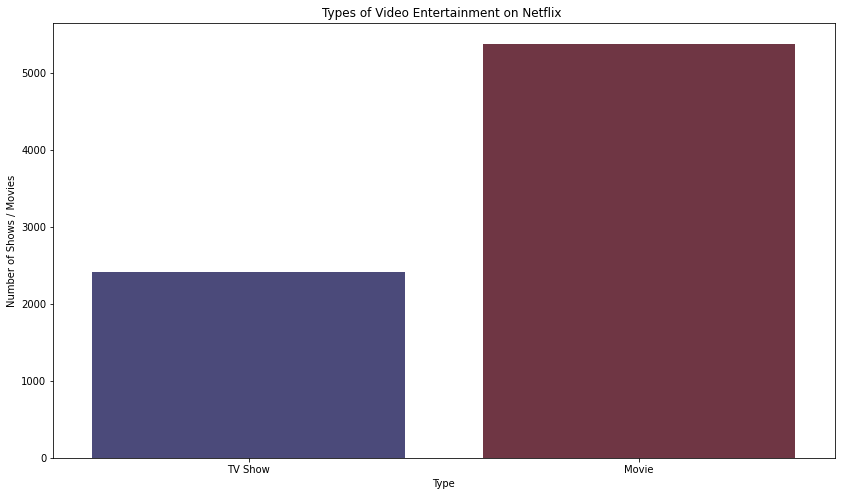

In [172]:
a = plt.figure(figsize=(14,8))
a = sns.countplot(x= df['type'], data = df,palette='icefire')
a = plt.title('Types of Video Entertainment on Netflix ')
a = plt.xlabel('Type')
a = plt.ylabel('Number of Shows / Movies')

####**OBSERVATIONS**
> * **There are almost twice as many movies as TV shows on Netflix.**

### **Different Ratings on the Platform**

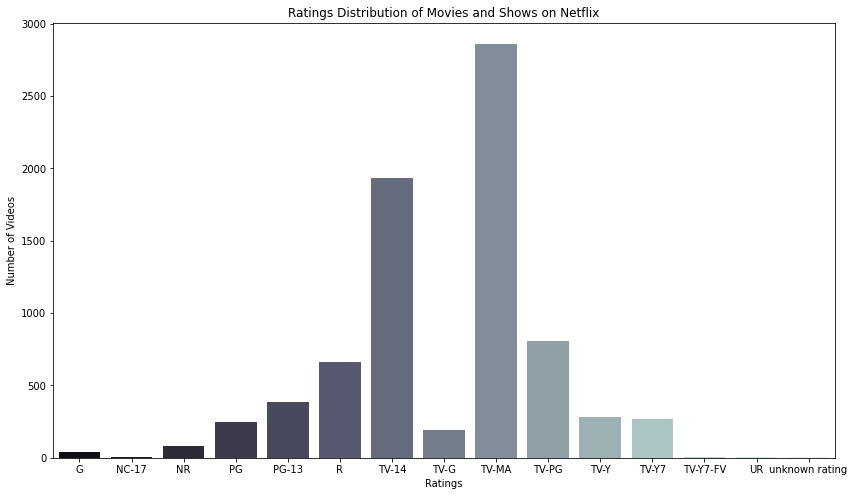

In [164]:
a = plt.figure(figsize=(14,8))
d = df.groupby('rating').agg({'show_id':'count'}).reset_index()
a = sns.barplot(x= d['rating'], y=d['show_id'], palette='bone')
a = plt.title('Ratings Distribution of Movies and Shows on Netflix')
a = plt.xlabel('Ratings')
a = plt.ylabel('Number of Videos')

####**OBSERVATIONS**
> * **Most content on Netflix is rated for Mature Audiences and over 14 years old**

### **Top 10 Countries that produced content on Netflix**

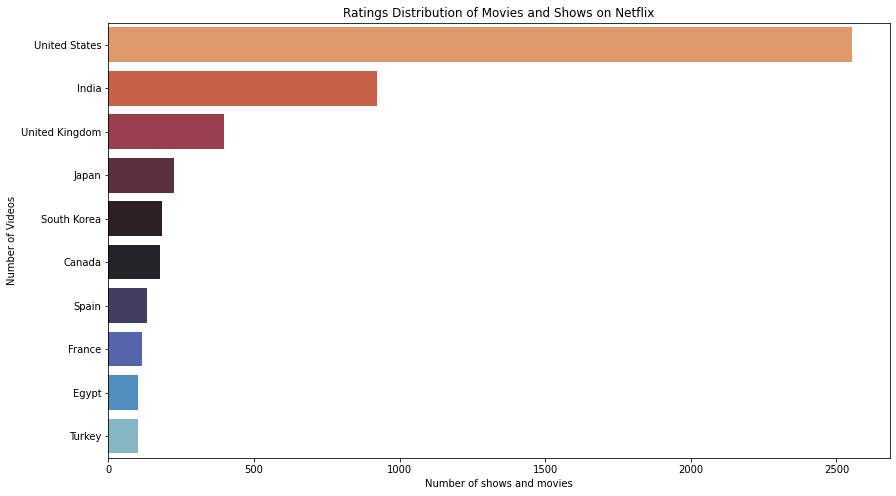

In [186]:

a = plt.figure(figsize=(14,8))
d = df.groupby('country').agg({'show_id':'count'}).reset_index().sort_values('show_id', ascending= False)
d = d[d.country != 'unknown country'].head(10)
a = sns.barplot(y= d['country'], x=d['show_id'], palette='icefire_r')
a = plt.title('Ratings Distribution of Movies and Shows on Netflix')
a = plt.xlabel('Number of shows and movies')
a = plt.ylabel('Number of Videos')